In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
engine.execute("SELECT * FROM Measurement LIMIT 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date[0]

'2017-08-23'

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

date = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date == recent_date[0]).all()

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()

#List comprehension solution
rows = [{"Date": data[0], "Prcp": data[1]} for data in year_data] 

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
result = pd.DataFrame(rows).set_index("Date").sort_index()
result


,Prcp
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


ConversionError: Failed to convert value(s) to axis units: ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']

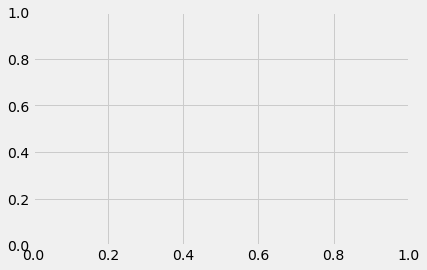

In [81]:
bins=["2016-08-23","2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"]
#df = result.groupby(pd.cut(result["Prcp"], bins=bins).val.count()
plt.hist(result, bins=bins)                    
#df.plot(kind="bar")
plt.show()

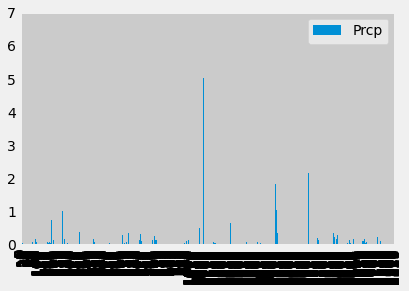

In [80]:
df.plot(kind="bar")
plt.show()

In [79]:
# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
count = session.query(Measurement.station).group_by(Measurement.station).count()
count

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()    
station_counts 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# highest
session.query(Measurement.tobs, func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()


[(85.0, 85.0)]

In [17]:
#lowest
session.query(Measurement.tobs, func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()


[(54.0, 54.0)]

In [18]:
#average
session.query(Measurement.tobs, func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(70.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

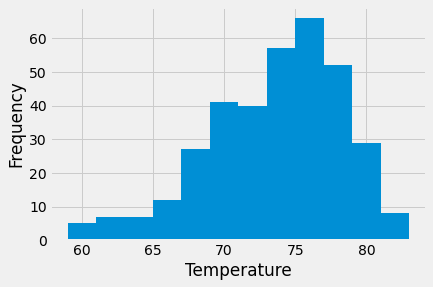

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tob = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date > year_ago).all()
tobs = [t[0] for t in tob]
plt.hist(tobs, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [20]:
# Close Session
session.close()